# Movie Price Data from King County

Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Data Science Lifecycle
[![DataScienceLifecycle](https://lh3.googleusercontent.com/proxy/CCxE8emkOFmYKlbCCosjHkZuOo5Umo6G1-eYbihJvIfXmDtHQwbqW-yznUgXbsvKJt4iv9UDplmrCVSL5oXxoioD2LES0UW5Vt3Zozv1SsMq4RGGJPCQgG1L0W6JoPxNjoDSnurNddICYcKERffslWe1NFUZjTF7PA)](https://lh3.googleusercontent.com/proxy/CCxE8emkOFmYKlbCCosjHkZuOo5Umo6G1-eYbihJvIfXmDtHQwbqW-yznUgXbsvKJt4iv9UDplmrCVSL5oXxoioD2LES0UW5Vt3Zozv1SsMq4RGGJPCQgG1L0W6JoPxNjoDSnurNddICYcKERffslWe1NFUZjTF7PA)

We structure this project based off the above Data Science Lifecyle to structure and organize this project. In this project we will follow this structure. We will see, at times, these steps will be revisited.

## Business  Understanding
From above, we see at "01" that we must obtain ask ourselves relevant questions and define objectives:
### Questions:
* "Why did you pick those features as predictors?"
    * **These predictors will have p-values less than 0.05**
* "How confident are you in the predictive quality of the results?"
    * **Because we are only going to us predictors that have p-values less than 0.05, there is a 5% risk of concluding that these predictors influence housing prices when when there is no actual influence.**
* "What are some of the things that could cause the results to be wrong?"

### Objectives:
* Clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible
* Render at least 4 meaningful data visualizations, with corresponding interpretations
* Pose at least 3 meaningful questions and answer them through EDA
* 1 - 2 paragraphs briefly explaining your approach to this project
* Model should not include any predictors with p-values greater than .05.
* An iterative approach to modeling, and details the parameters and results of the model at each iteration
* Provide at least 1 paragraph explaining your final model.
* Pick at least 3 coefficients from your final model and explain their impact on the price of a house in this dataset.
* Identify at least two concrete features that highly influence housing prices.

## Data Mining
Moving on to "02", we must gather and scrape the data necessary for this project. We will only be using data from King County dataset provided by Flatiron School. We import this data into a pandas dataframe and display the first five entries to ensure correct importation:

### Importing Data

In [1]:
import pandas as pd

df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Cleaning
Next, "03" says we fix inconsistencies within our data and handle missing values. Inconsistencies mean for example the presence of dublicate values or extremely high/low numbers which are code for absent data or just plain NaN values (i.e. also means absent data). Here is a quick look at the data:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Duplicated Entries

In [3]:
df[df.duplicated(subset='id')] #check if there are duplicated id's


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,0.0,0.0,...,9,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,0.0,0.0,...,7,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


In [4]:
df[df.id == 6021501535] #this is one of the duplicated id's

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.5,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.5,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500


Note: the below code was adapted from [Resource 1](#Resources:)

In [5]:
# from df.info() we see that date is an object type. 
df['date'] = pd.to_datetime(df['date']) #let's covert it to a datetime type for sorting.(1)

In [6]:
df.sort_values(by='date', ascending=False, inplace=True) #sort from most recent date first to least recent date last.
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16580,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0.0,0.0,...,8,2440,1310.0,1924,0.0,98115,47.6747,-122.303,2170,4590
13040,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0.0,0.0,...,6,720,670.0,1941,0.0,98115,47.6914,-122.308,920,6380
5632,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0.0,0.0,...,7,1870,0.0,1960,0.0,98007,47.5951,-122.144,1870,7650
15797,7129304540,2015-05-14,440000.0,5,2.00,1430,5600,1.5,0.0,0.0,...,6,1430,0.0,1947,0.0,98118,47.5192,-122.266,1860,5980
927,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0.0,0.0,...,8,1080,290.0,2009,0.0,98133,47.7052,-122.343,1370,1090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0.0,0.0,...,7,1450,0.0,1954,0.0,98006,47.5746,-122.135,1260,8942
19661,7853220390,2014-05-02,785000.0,5,3.25,3660,11995,2.0,0.0,2.0,...,10,3660,0.0,2006,0.0,98065,47.5337,-121.860,3320,11241
6418,2011000010,2014-05-02,257950.0,3,1.75,1370,5858,1.0,NaN,0.0,...,7,1370,0.0,1987,0.0,98198,47.3815,-122.313,1400,7500
10689,2738600140,2014-05-02,499950.0,4,2.50,2860,3345,2.0,0.0,0.0,...,8,2190,670.0,2004,0.0,98072,47.7735,-122.158,2860,3596


In [7]:
df.drop_duplicates(subset='id', keep='first', inplace=True) #keep only most recent id
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16580,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0.0,0.0,...,8,2440,1310.0,1924,0.0,98115,47.6747,-122.303,2170,4590
13040,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0.0,0.0,...,6,720,670.0,1941,0.0,98115,47.6914,-122.308,920,6380
5632,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0.0,0.0,...,7,1870,0.0,1960,0.0,98007,47.5951,-122.144,1870,7650
15797,7129304540,2015-05-14,440000.0,5,2.00,1430,5600,1.5,0.0,0.0,...,6,1430,0.0,1947,0.0,98118,47.5192,-122.266,1860,5980
927,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0.0,0.0,...,8,1080,290.0,2009,0.0,98133,47.7052,-122.343,1370,1090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0.0,0.0,...,7,1450,0.0,1954,0.0,98006,47.5746,-122.135,1260,8942
19661,7853220390,2014-05-02,785000.0,5,3.25,3660,11995,2.0,0.0,2.0,...,10,3660,0.0,2006,0.0,98065,47.5337,-121.860,3320,11241
6418,2011000010,2014-05-02,257950.0,3,1.75,1370,5858,1.0,NaN,0.0,...,7,1370,0.0,1987,0.0,98198,47.3815,-122.313,1400,7500
10689,2738600140,2014-05-02,499950.0,4,2.50,2860,3345,2.0,0.0,0.0,...,8,2190,670.0,2004,0.0,98072,47.7735,-122.158,2860,3596


### Missing Values
Now that we have taken care of duplicate values, we can look at missing data.

In [8]:
df.info() # helps us see in which columns the NaN's reside

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 16580 to 4959
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   price          21420 non-null  float64       
 3   bedrooms       21420 non-null  int64         
 4   bathrooms      21420 non-null  float64       
 5   sqft_living    21420 non-null  int64         
 6   sqft_lot       21420 non-null  int64         
 7   floors         21420 non-null  float64       
 8   waterfront     19067 non-null  float64       
 9   view           21357 non-null  float64       
 10  condition      21420 non-null  int64         
 11  grade          21420 non-null  int64         
 12  sqft_above     21420 non-null  int64         
 13  sqft_basement  21420 non-null  object        
 14  yr_built       21420 non-null  int64         
 15  yr_renovated   1

From above, we see that most columns have 21420 non-null entires. Let's look at the stats for each column as well:

In [9]:
df.describe() #helps us see how skewed the data is by comparing the column's mean to the column's 50% quartile.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,19067.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,17607.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007657,0.234677,3.410784,7.662792,1791.170215,1971.092997,83.890101,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087172,0.766459,0.650035,1.171971,828.692965,29.387141,400.534473,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


From the above, we see that 'waterfront', 'view', and 'yr_renovated' have NaN values and at least 75% of the data is made up of zeros. Let us look at 'waterfront' first, then we will look at the others. 'waterfront' has a very low mean of 0.007657. Let's take a closer look at it.

In [10]:
df.waterfront.value_counts() #this gives what values are in column

0.0    18921
1.0      146
Name: waterfront, dtype: int64

In [11]:
len(df[df.waterfront.isna()]) #this tells us how many values are NaN out of 21420

2353

In [12]:
len(df.waterfront.values) #makes sure there are 21420 entries

21420

In [13]:
#Percent that is a 0 or 'No' from waterfront excluding NaN values
print(f'Percent of data that is 0 (i.e.\'No\') excluding NaN\'s: {round(((df.waterfront.value_counts()[0]))/(len(df)-len(df[df.waterfront.isna()])) * 100, 2)}%')
#Percent that is a NaN from waterfront with overall data
print(f'Percent of data that is NaN: {round((len(df[df.waterfront.isna()]))/len(df) * 100, 2)}%')
#Percent that is a 0 or NaN with overall data
print(f'Percent of data that is either 0 (i.e.\'No\') or NaN: {round((df.waterfront.value_counts()[0]+len(df[df.waterfront.isna()]))/len(df) * 100, 2)}%')

Percent of data that is 0 (i.e.'No') excluding NaN's: 99.23%
Percent of data that is NaN: 10.99%
Percent of data that is either 0 (i.e.'No') or NaN: 99.32%


From the above, we determine that we can drop 'waterfront' column, but not the complete house entry (row) because: 
1. Virtually all the houses do not have a 'waterfront'.
2. NaN's make up 10.99% of our data.


In [14]:
df.drop(labels='waterfront', axis=1, inplace=True) #drops 'waterfront' column
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16580,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0.0,5,8,2440,1310.0,1924,0.0,98115,47.6747,-122.303,2170,4590
13040,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0.0,3,6,720,670.0,1941,0.0,98115,47.6914,-122.308,920,6380
5632,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0.0,3,7,1870,0.0,1960,0.0,98007,47.5951,-122.144,1870,7650
15797,7129304540,2015-05-14,440000.0,5,2.00,1430,5600,1.5,0.0,3,6,1430,0.0,1947,0.0,98118,47.5192,-122.266,1860,5980
927,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0.0,3,8,1080,290.0,2009,0.0,98133,47.7052,-122.343,1370,1090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0.0,4,7,1450,0.0,1954,0.0,98006,47.5746,-122.135,1260,8942
19661,7853220390,2014-05-02,785000.0,5,3.25,3660,11995,2.0,2.0,3,10,3660,0.0,2006,0.0,98065,47.5337,-121.860,3320,11241
6418,2011000010,2014-05-02,257950.0,3,1.75,1370,5858,1.0,0.0,3,7,1370,0.0,1987,0.0,98198,47.3815,-122.313,1400,7500
10689,2738600140,2014-05-02,499950.0,4,2.50,2860,3345,2.0,0.0,3,8,2190,670.0,2004,0.0,98072,47.7735,-122.158,2860,3596


In [15]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,17607.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.234677,3.410784,7.662792,1791.170215,1971.092997,83.890101,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.766459,0.650035,1.171971,828.692965,29.387141,400.534473,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


After we do this, let us check out if we can drop 'view' and 'yr_renovated' as well.

In [16]:
df.view.value_counts() #tells us which values are in 'view' column

0.0    19253
2.0      956
3.0      505
1.0      329
4.0      314
Name: view, dtype: int64

In [17]:
[num for num in df.view.value_counts() if num < 1000] #this shows how to isolate the number of values other than zero.

[956, 505, 329, 314]

In [18]:
other_values = sum([num for num in df.view.value_counts() if num < 1000]) #calculates total number of values other than zero

In [19]:
len(df[df.view.isna()]) #tells us number of NaN's in 'view' column

63

In [20]:
len(df.view.values) #tells us the number of data entries for 'view' column

21420

In [21]:
[num for num in df.view.value_counts() if num < 1000] #this calculates the number of values other than zero.

[956, 505, 329, 314]

In [22]:
other_values = sum([num for num in df.view.value_counts() if num < 1000])

In [23]:
#Percent that is a 0 or 'No' from waterfront excluding NaN values
print(f'Percent of data that is 0 (i.e.\'No\') excluding NaN\'s: {round(((df.view.value_counts()[0]))/(len(df)-len(df[df.view.isna()])) * 100, 2)}%')
#Percent that is a NaN from waterfront with overall data
print(f'Percent of data that is NaN: {round((len(df[df.view.isna()]))/len(df) * 100, 2)}%')
#Percent that is a 0 or NaN with overall data
print(f'Percent of data that is either 0 (i.e.\'No\') or NaN: {round((df.view.value_counts()[0]+len(df[df.view.isna()]))/len(df) * 100, 2)}%')
#Percent that is value other than 0
print(f'Percent of data that is a value other than 0 excluding NaN\'s: {round((other_values)/(len(df)-len(df[df.view.isna()])) * 100, 2)}%')

Percent of data that is 0 (i.e.'No') excluding NaN's: 90.15%
Percent of data that is NaN: 0.29%
Percent of data that is either 0 (i.e.'No') or NaN: 90.18%
Percent of data that is a value other than 0 excluding NaN's: 9.85%


From the above, we determine that we can drop house entries (rows) that have NaN for the 'view' column, but not the complete column because: 

1. Only 0.29% of houses have NaN for 'view'
2. Other values besides 0 make up almost 10% of data with NaN entries taken out.

In [24]:
df.dropna(subset=['view'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 16580 to 4959
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21357 non-null  int64         
 1   date           21357 non-null  datetime64[ns]
 2   price          21357 non-null  float64       
 3   bedrooms       21357 non-null  int64         
 4   bathrooms      21357 non-null  float64       
 5   sqft_living    21357 non-null  int64         
 6   sqft_lot       21357 non-null  int64         
 7   floors         21357 non-null  float64       
 8   view           21357 non-null  float64       
 9   condition      21357 non-null  int64         
 10  grade          21357 non-null  int64         
 11  sqft_above     21357 non-null  int64         
 12  sqft_basement  21357 non-null  object        
 13  yr_built       21357 non-null  int64         
 14  yr_renovated   17556 non-null  float64       
 15  zipcode        2

Finally, let's look at what values are in 'yr_renovated' and the stats:

In [25]:
df.yr_renovated.value_counts()

0.0       16817
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1971.0        1
1954.0        1
1950.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [26]:
df.yr_renovated.min(), df.yr_renovated.max(), df.yr_renovated.mean(), df.yr_renovated.std() #we use this to look at the value spread

(0.0, 2015.0, 84.02016404647983, 400.83140986202795)

In [27]:
len(df[df.yr_renovated.isna()])

3801

In [28]:
len(df.yr_renovated)

21357

In [29]:
#Percent that is a 0 or 'No' from 'yr_renovated' excluding NaN values
print(f'Percent of data that is 0 (i.e.\'No\') excluding NaN\'s: {round(((df.yr_renovated.value_counts()[0]))/(len(df)-len(df[df.yr_renovated.isna()])) * 100, 2)}%')
#Percent that is a NaN from 'yr_renovated' with overall data
print(f'Percent of data that is NaN: {round((len(df[df.yr_renovated.isna()]))/len(df) * 100, 2)}%')
#Percent that is a 0 or NaN with overall data
print(f'Percent of data that is either 0 (i.e.\'No\') or NaN: {round((df.yr_renovated.value_counts()[0]+len(df[df.yr_renovated.isna()]))/len(df) * 100, 2)}%')
#Percent that is value other than 0
other_values = sum([num for num in df.yr_renovated.value_counts() if num < 10000])
print(f'Percent of data that is a value other than 0 excluding NaN\'s: {round((other_values)/(len(df)-len(df[df.yr_renovated.isna()])) * 100, 2)}%')

Percent of data that is 0 (i.e.'No') excluding NaN's: 95.79%
Percent of data that is NaN: 17.8%
Percent of data that is either 0 (i.e.'No') or NaN: 96.54%
Percent of data that is a value other than 0 excluding NaN's: 4.21%


From the above, we determine that we can drop 'yr_renovated' column, but not the complete house entry (row) because: 
1. More than 95% of all the houses have no renovation date.
2. NaN's make up 17.8% of our data for this column.

In [30]:
df.drop(labels='yr_renovated', axis=1, inplace=True) #drops 'waterfront' column
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
16580,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0.0,5,8,2440,1310.0,1924,98115,47.6747,-122.303,2170,4590
13040,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0.0,3,6,720,670.0,1941,98115,47.6914,-122.308,920,6380
5632,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0.0,3,7,1870,0.0,1960,98007,47.5951,-122.144,1870,7650
15797,7129304540,2015-05-14,440000.0,5,2.00,1430,5600,1.5,0.0,3,6,1430,0.0,1947,98118,47.5192,-122.266,1860,5980
927,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0.0,3,8,1080,290.0,2009,98133,47.7052,-122.343,1370,1090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0.0,4,7,1450,0.0,1954,98006,47.5746,-122.135,1260,8942
19661,7853220390,2014-05-02,785000.0,5,3.25,3660,11995,2.0,2.0,3,10,3660,0.0,2006,98065,47.5337,-121.860,3320,11241
6418,2011000010,2014-05-02,257950.0,3,1.75,1370,5858,1.0,0.0,3,7,1370,0.0,1987,98198,47.3815,-122.313,1400,7500
10689,2738600140,2014-05-02,499950.0,4,2.50,2860,3345,2.0,0.0,3,8,2190,670.0,2004,98072,47.7735,-122.158,2860,3596


From below, we can see that all columns match now and the mean is closer to the the 50% quartile for all columns as well; this is important because, as a result of our cleaning, we have more normalized data:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 16580 to 4959
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21357 non-null  int64         
 1   date           21357 non-null  datetime64[ns]
 2   price          21357 non-null  float64       
 3   bedrooms       21357 non-null  int64         
 4   bathrooms      21357 non-null  float64       
 5   sqft_living    21357 non-null  int64         
 6   sqft_lot       21357 non-null  int64         
 7   floors         21357 non-null  float64       
 8   view           21357 non-null  float64       
 9   condition      21357 non-null  int64         
 10  grade          21357 non-null  int64         
 11  sqft_above     21357 non-null  int64         
 12  sqft_basement  21357 non-null  object        
 13  yr_built       21357 non-null  int64         
 14  zipcode        21357 non-null  int64         
 15  lat            2

In [32]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.135700e+04,2.135700e+04,21357.000000,21357.000000,21357.000000,2.135700e+04,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000
mean,4.582834e+09,5.416252e+05,3.373788,2.118322,2082.642834,1.511924e+04,1.496020,0.234677,3.410685,7.662312,1791.138175,1971.095894,98077.861544,47.560285,-122.213749,1988.066255,12768.505876
std,2.876805e+09,3.662398e+05,0.925514,0.768334,918.147434,4.149855e+04,0.540206,0.766459,0.650143,1.171407,828.681607,29.387983,53.470865,0.138566,0.140802,685.428458,27326.770308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124049e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,98033.000000,47.471300,-122.328000,1490.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.613000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.572200,-122.230000,1840.000000,7620.000000
75%,7.312000e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069600e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,98117.000000,47.678100,-122.125000,2370.000000,10087.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Exploration
With '03' out of the way, we move onto '04' which calls us to form a hypotheses about our defined problems with visualizations from our data. At the conclusion of this section, we will formulate a null and alternative hypothesis.

### The Discovery of '?' in Dataset

As a first step of data exploration, we should plot the scatter plot of all features:

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\johnh\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


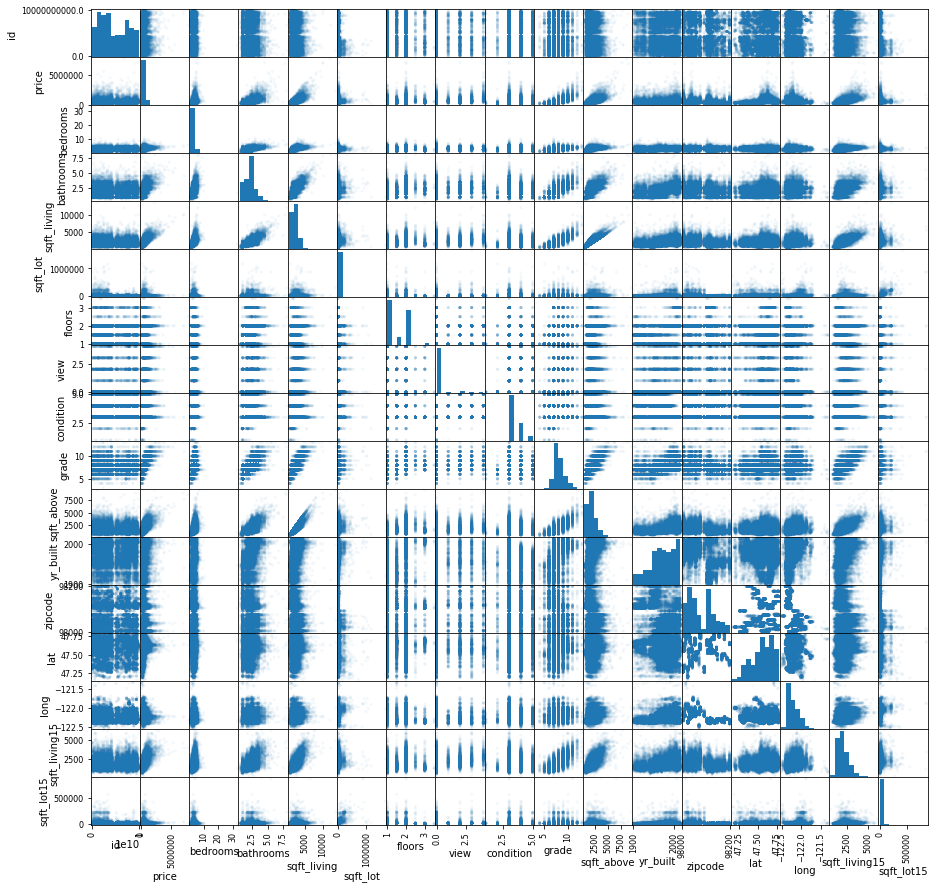

In [34]:
pd.plotting.scatter_matrix(df, alpha=0.05, figsize=[15,15]) #Let's look at the scatter plot of all the features
plt.show()

In [35]:
df.dtypes #From above and below, we can see that 'sqft_basement' did not plot and that it is an object.

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [36]:
df['sqft_basement'].value_counts() #let's look at what values are in 'sqft_basement'

0.0       12688
?           450
600.0       215
500.0       206
700.0       205
          ...  
506.0         1
4820.0        1
374.0         1
2570.0        1
704.0         1
Name: sqft_basement, Length: 302, dtype: int64

In [37]:
#Percent that is a 0 or 'No' from 'sqft_basement'
print(f'Percent of data that is 0 (i.e.\'No\'): {round(((df.sqft_basement.value_counts()[0]))/(len(df)-len(df[df.view.isna()])) * 100, 2)}%')
#Percent that is a 0 or ?
print(f'Percent of data that is either 0 (i.e.\'No\') or ?: {round((df.sqft_basement.value_counts()[0]+df.sqft_basement.value_counts()[1])/len(df) * 100, 2)}%')
#Percent that is value other than 0 or ?
other_values = sum([num for num in df.sqft_basement.value_counts() if num < 450])
print(f'Percent of data that is a value other than 0: {round((other_values)/(len(df)-len(df[df.sqft_basement.isna()])) * 100, 2)}%')

Percent of data that is 0 (i.e.'No'): 59.41%
Percent of data that is either 0 (i.e.'No') or ?: 61.52%
Percent of data that is a value other than 0: 38.48%


In [38]:
df['sqft_basement'] #there are a total of 21357 values.

16580    1310.0
13040     670.0
5632        0.0
15797       0.0
927       290.0
          ...  
7316        0.0
19661       0.0
6418        0.0
10689     670.0
4959      360.0
Name: sqft_basement, Length: 21357, dtype: object

From above, we notice that we need to handle the '?' and the large amount of 0 values. The first method we will try is by removing '?' and o values. The huge disadvantage to removing these is that we lose 61.52% of our data!

In [39]:
dfs = df.copy() #make a copy of df to see what would be the best method to clean up 'sqft_basement'

In [40]:
import scipy.stats as stats

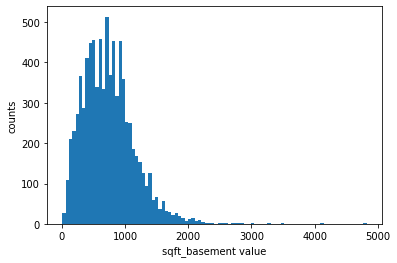

In [41]:
#Below we select only the values in 'sqft_basement that are not '?' nor 0.0 and plot these.
L1 = dfs[(df['sqft_basement'] != '?') & (df['sqft_basement'] != '0.0')].loc[:,'sqft_basement'].astype(float)
plt.xlabel('sqft_basement value')
plt.ylabel('counts')
plt.hist(L1, bins='auto')
plt.show()

From the above histogram plot, we can see that even with just the values, the distribution is not normaly distributed.

Let us see if we can get rid of outliers using Interquartile method, and then see our correlation vs 'price'.

In [42]:
def outlier_detection(datacolumn):
    '''
    Input ordered or unordered list of values. These values will be sorted, then quartile 1, 3 and IQR range will be determined.
    Returns lower_bound, and upper_bound of IQR.
    '''
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn, [25, 75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

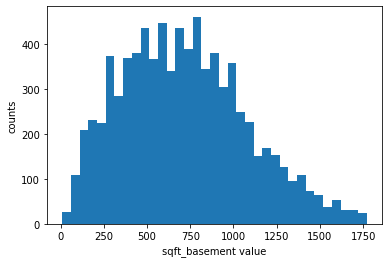

In [43]:
lower_bound, upper_bound = outlier_detection(L1)
L1_new = [num for num in L1 if (num >= lower_bound) and (num <= upper_bound)] #filter out values that are below or above range
plt.xlabel('sqft_basement value')
plt.ylabel('counts')
plt.hist(L1_new, bins='auto') #plot new histogram plot.
plt.show()

Now that our data is more normally distributed, let us see how highly 'price' correlates with 'sqft_basement value'

In [44]:
df2 = df.copy() #another copy

In [45]:
df2.sqft_basement

16580    1310.0
13040     670.0
5632        0.0
15797       0.0
927       290.0
          ...  
7316        0.0
19661       0.0
6418        0.0
10689     670.0
4959      360.0
Name: sqft_basement, Length: 21357, dtype: object

In [46]:
#we again select only the values in 'sqft_basement that are not '?' nor 0.0 
df2['sqft_basement'] = df2[(df['sqft_basement'] != '?') & (df['sqft_basement'] != '0.0')].loc[:,'sqft_basement'].astype(float)

In [47]:
df2['sqft_basement'] #we see that it fills these values with NaN

16580    1310.0
13040     670.0
5632        NaN
15797       NaN
927       290.0
          ...  
7316        NaN
19661       NaN
6418        NaN
10689     670.0
4959      360.0
Name: sqft_basement, Length: 21357, dtype: float64

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 16580 to 4959
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21357 non-null  int64         
 1   date           21357 non-null  datetime64[ns]
 2   price          21357 non-null  float64       
 3   bedrooms       21357 non-null  int64         
 4   bathrooms      21357 non-null  float64       
 5   sqft_living    21357 non-null  int64         
 6   sqft_lot       21357 non-null  int64         
 7   floors         21357 non-null  float64       
 8   view           21357 non-null  float64       
 9   condition      21357 non-null  int64         
 10  grade          21357 non-null  int64         
 11  sqft_above     21357 non-null  int64         
 12  sqft_basement  8219 non-null   float64       
 13  yr_built       21357 non-null  int64         
 14  zipcode        21357 non-null  int64         
 15  lat            2

In [49]:
# we convert values that are outside of the lower and upper IQR bounds to NaN
df2['sqft_basement'] = df2['sqft_basement'].map(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else np.nan)

In [50]:
df2['sqft_basement']

16580    1310.0
13040     670.0
5632        NaN
15797       NaN
927       290.0
          ...  
7316        NaN
19661       NaN
6418        NaN
10689     670.0
4959      360.0
Name: sqft_basement, Length: 21357, dtype: float64

In [51]:
df2[['price', 'sqft_basement']]

,price,sqft_basement
16580,1310000.0,1310.0
13040,445500.0,670.0
5632,450000.0,NaN
15797,440000.0,NaN
927,359000.0,290.0
...,...,...
7316,435000.0,NaN
19661,785000.0,NaN
6418,257950.0,NaN
10689,499950.0,670.0


In [52]:
df2.info() # we note that we have decreased in non-null float64 for 'sqft_basement'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 16580 to 4959
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21357 non-null  int64         
 1   date           21357 non-null  datetime64[ns]
 2   price          21357 non-null  float64       
 3   bedrooms       21357 non-null  int64         
 4   bathrooms      21357 non-null  float64       
 5   sqft_living    21357 non-null  int64         
 6   sqft_lot       21357 non-null  int64         
 7   floors         21357 non-null  float64       
 8   view           21357 non-null  float64       
 9   condition      21357 non-null  int64         
 10  grade          21357 non-null  int64         
 11  sqft_above     21357 non-null  int64         
 12  sqft_basement  8068 non-null   float64       
 13  yr_built       21357 non-null  int64         
 14  zipcode        21357 non-null  int64         
 15  lat            2

C:\Users\johnh\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\johnh\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
C:\Users\johnh\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\johnh\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


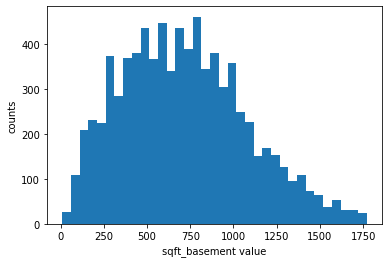

In [53]:
plt.xlabel('sqft_basement value')
plt.ylabel('counts')
plt.hist(df2.sqft_basement, bins='auto')
#plt.scatter()
plt.show()

In [54]:
df2.corr().loc['price', 'sqft_basement'] #pearson r

0.3234769497231239

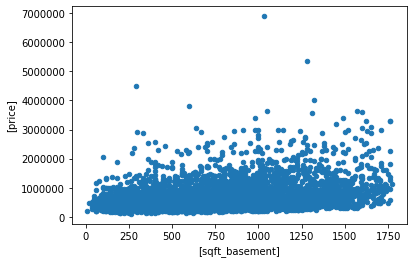

In [55]:
df2.plot.scatter(x=['sqft_basement'], y=['price'])
plt.show()

We see from above 'sqft_basement' has a Pearson correlation of ~0.32 with 'price'; however, this is only relevant for less than 39% of our original data! In addition, we can visually see that correlation is weak.

Let us try looking at the correlation between 'price' and 'sqft_basement' from a different perspective: whether just having a basement increases price. We will do this by using Point-Biserial Correlation ([Resource 2](#Resources:))

In [56]:
dfe = df.copy()

In [57]:
# Below, we are converting any 'sqft_basement' values that are '?' or '0.0' to 0 and any value > 0 to 1.
dfe['sqft_basement'] = dfe['sqft_basement'].map(lambda x: 0 if (x == '?') or (x == '0.0') else x).astype(bool).astype(int)
dfe['sqft_basement'].value_counts() # we can check this is right by adding the number of 0.0 values with '?' values.

0    13138
1     8219
Name: sqft_basement, dtype: int64

In [58]:
import pandas as pd
from scipy.stats import pointbiserialr

# pbc of first question
pbc = pointbiserialr(dfe['sqft_basement'], dfe['price'])
print(pbc, '\nThe value above is equivalent to Pearson\'s Correlation Coefficent')

PointbiserialrResult(correlation=0.17761074092707388, pvalue=7.04077929653769e-151) 
The value above is equivalent to Pearson's Correlation Coefficent


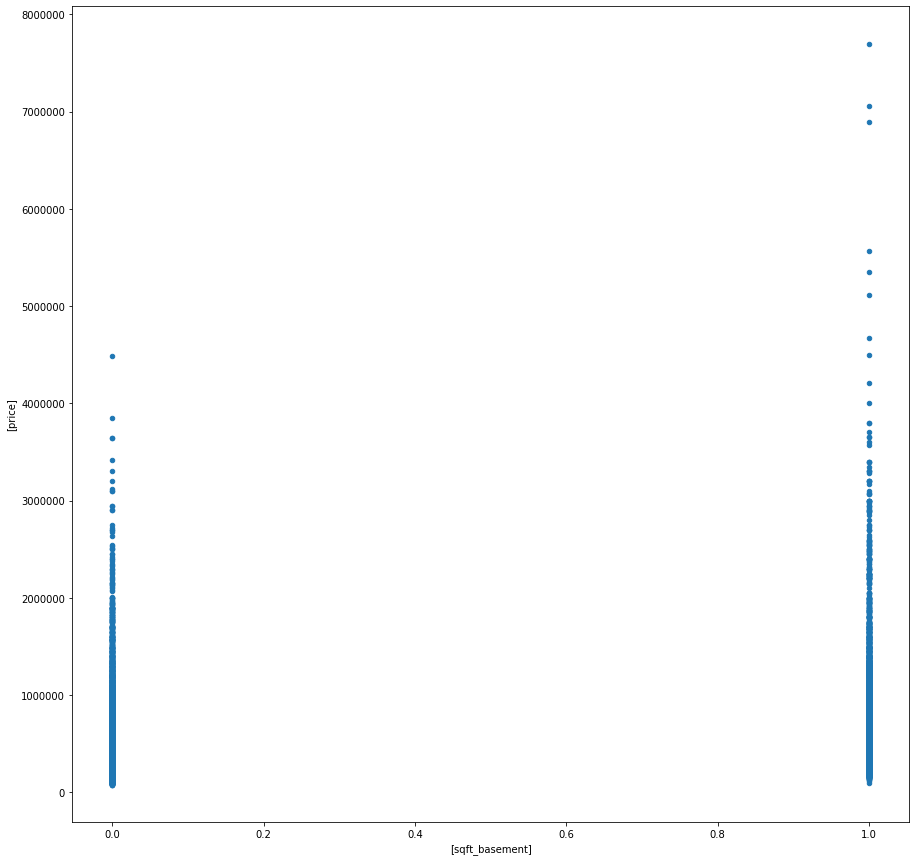

In [59]:
dfe.plot.scatter(x=['sqft_basement'], y=['price'], figsize=[15,15])
plt.show()

When all the data is considered in this way, we see an even weaker correlation between 'sqft_basement' and 'price'; however, this is representative of all the data prior to removing '?' and '0.0' values. As such, we will proceed with this method since it is more representative.

In [60]:
df = dfe # we accept the second method and change our df accordingly.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 16580 to 4959
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21357 non-null  int64         
 1   date           21357 non-null  datetime64[ns]
 2   price          21357 non-null  float64       
 3   bedrooms       21357 non-null  int64         
 4   bathrooms      21357 non-null  float64       
 5   sqft_living    21357 non-null  int64         
 6   sqft_lot       21357 non-null  int64         
 7   floors         21357 non-null  float64       
 8   view           21357 non-null  float64       
 9   condition      21357 non-null  int64         
 10  grade          21357 non-null  int64         
 11  sqft_above     21357 non-null  int64         
 12  sqft_basement  21357 non-null  int32         
 13  yr_built       21357 non-null  int64         
 14  zipcode        21357 non-null  int64         
 15  lat            2

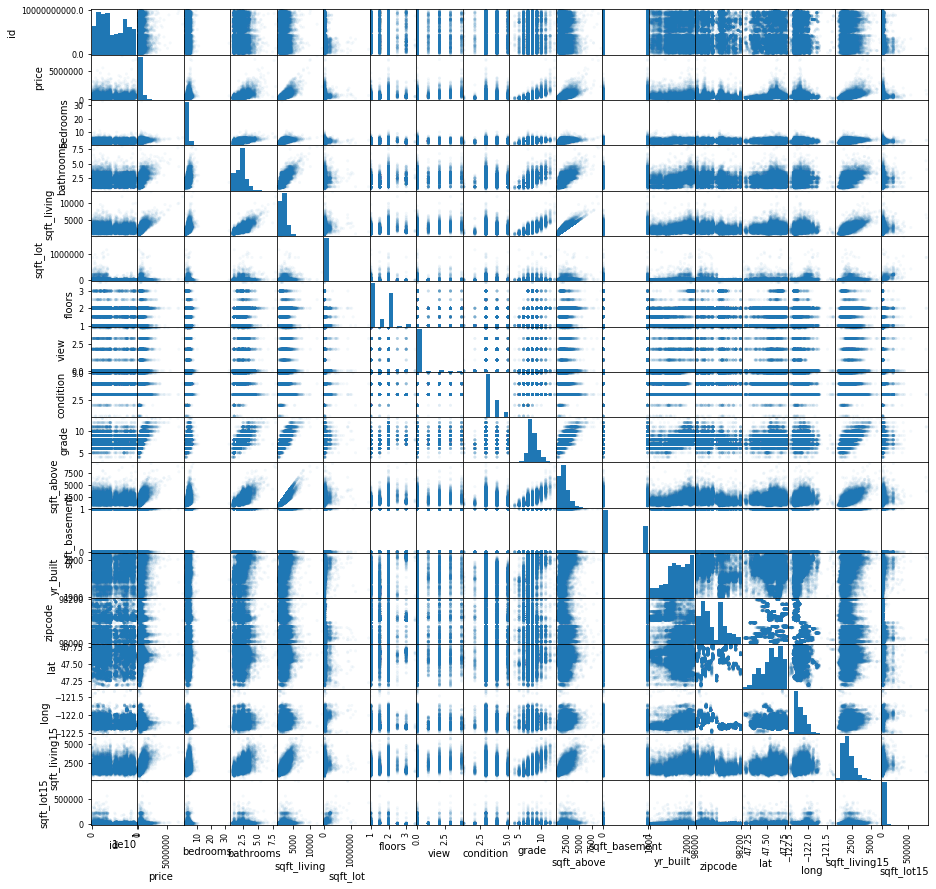

In [61]:
pd.plotting.scatter_matrix(df, alpha=0.05, figsize=[15,15]) #Let's look at the scatter plot of all the features
plt.show()

From above we can see that everything has plotted. Let us look at the heatmap next:

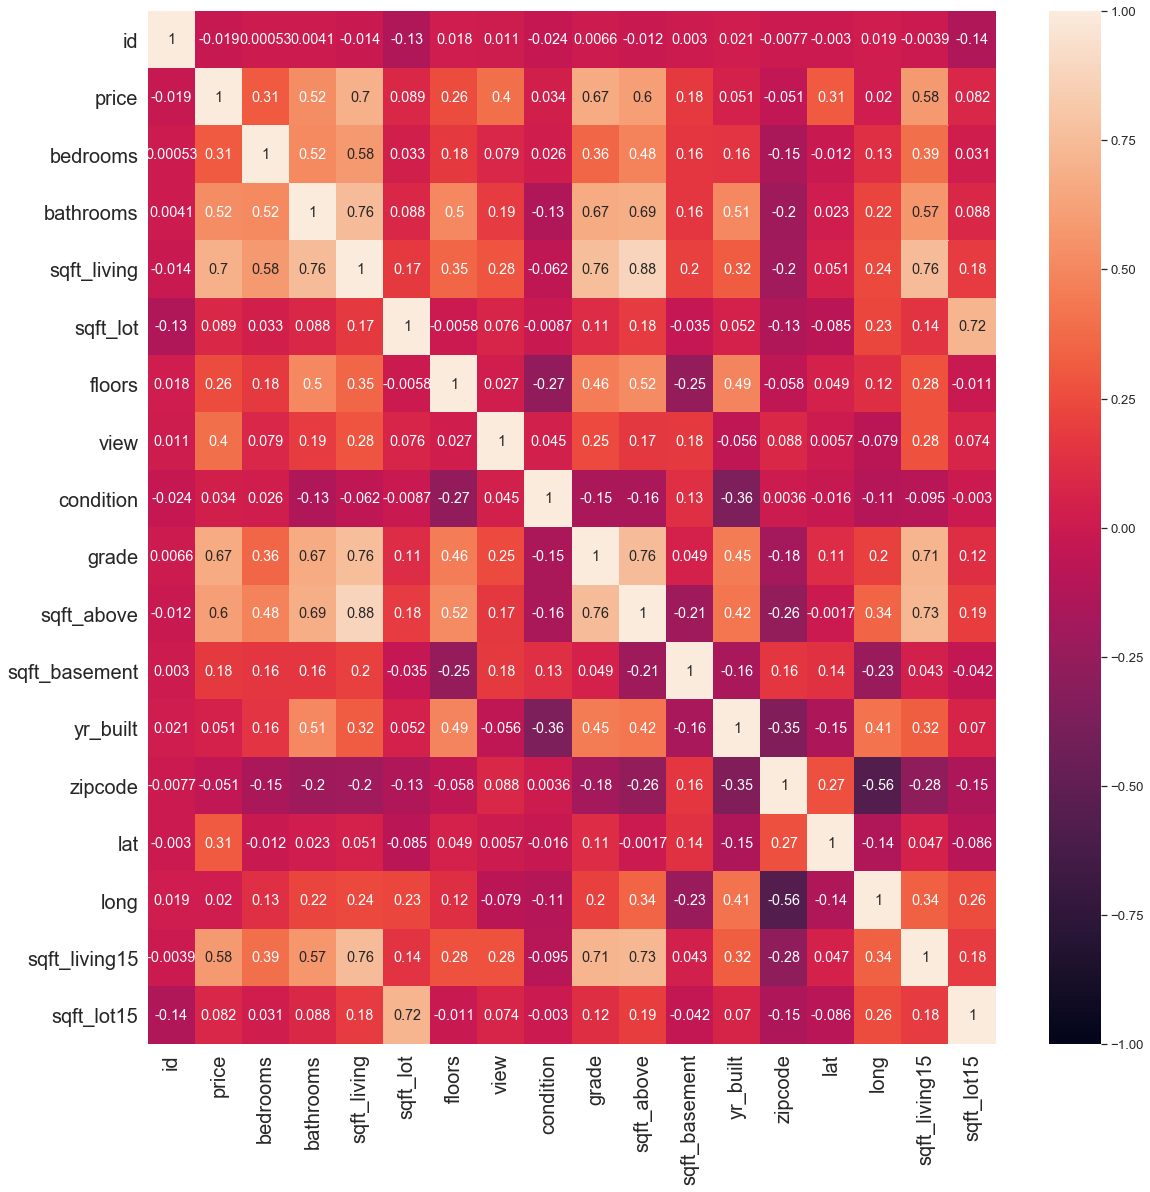

In [94]:
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.2)
plt.figure(figsize=[19,19])
ax = sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
ax.set_yticklabels(ax.get_ymajorticklabels(), size=20)
ax.set_xticklabels(ax.get_xmajorticklabels(), size=20)
plt.show()

From the above heatmap, we can get an idea which features correlate with price. The closer to 1 (or -1) the more highly correlated that feature is to 'price'. The features closest to zero will be ignored. Thus, we can formulate the following: 

H_0:  

Some or all of features, 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', or  'sqft_living15', may not be a predictor of house price.
       
H_a:   

Some or all of features, 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', or  'sqft_living15', may be a predictor of house price.

NOTE: Although 'lat' has a noticeable correlation with 'price', this data is dropped because it refers to location and cannot be used directly.

## Feature Engineering
Moving on to '05', we are tasked with selecting important features and constructing more meaningful ones using our data.

### Categorical Variables
Before moving to the next section, we must first identify which of the columns in our data are categorical variables with respect to 'price'.

In [103]:
df_FE = df.copy()

In [104]:
df_FE.drop(labels=['id', 'sqft_lot', 'floors', 'condition', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_lot15'], axis=1, inplace=True)
df_FE

,date,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,sqft_living15
16580,2015-05-27,1310000.0,4,2.25,3750,0.0,8,2440,1,2170
13040,2015-05-24,445500.0,2,1.75,1390,0.0,6,720,1,920
5632,2015-05-15,450000.0,5,2.00,1870,0.0,7,1870,0,1870
15797,2015-05-14,440000.0,5,2.00,1430,0.0,6,1430,0,1860
927,2015-05-14,359000.0,2,2.75,1370,0.0,8,1080,1,1370
...,...,...,...,...,...,...,...,...,...,...
7316,2014-05-02,435000.0,4,1.00,1450,0.0,7,1450,0,1260
19661,2014-05-02,785000.0,5,3.25,3660,2.0,10,3660,0,3320
6418,2014-05-02,257950.0,3,1.75,1370,0.0,7,1370,0,1400
10689,2014-05-02,499950.0,4,2.50,2860,0.0,8,2190,1,2860


In [105]:
df_FE.describe()

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,sqft_living15
count,2.135700e+04,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000
mean,5.416252e+05,3.373788,2.118322,2082.642834,0.234677,7.662312,1791.138175,0.384839,1988.066255
std,3.662398e+05,0.925514,0.768334,918.147434,0.766459,1.171407,828.681607,0.486569,685.428458
min,7.800000e+04,1.000000,0.500000,370.000000,0.000000,3.000000,370.000000,0.000000,399.000000
25%,3.249500e+05,3.000000,1.750000,1430.000000,0.000000,7.000000,1200.000000,0.000000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,0.000000,7.000000,1560.000000,0.000000,1840.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,0.000000,8.000000,2220.000000,1.000000,2370.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,4.000000,13.000000,9410.000000,1.000000,6210.000000


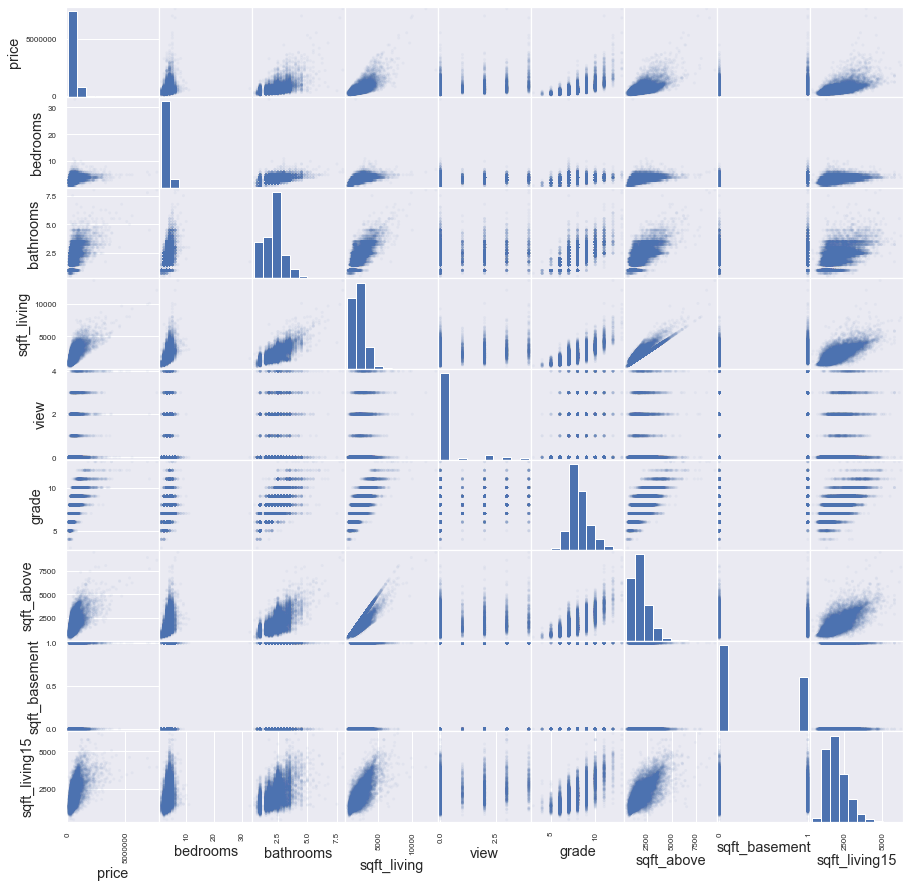

In [106]:
pd.plotting.scatter_matrix(df_FE, alpha=0.05, figsize=[15,15]) #Let's look at the scatter plot of all the features
plt.show()

## Resources:
1. https://stackoverflow.com/questions/28161356/sort-pandas-dataframe-by-date
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pointbiserialr.html